Read required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import matrix_rank
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

In [2]:
"""
url = 'https://raw.githubusercontent.com/aslanismailgit/HeartDisease/master/heart.csv'
df_url = pd.read_csv(url, error_bad_lines=False)
df_url.head()
"""

"\nurl = 'https://raw.githubusercontent.com/aslanismailgit/HeartDisease/master/heart.csv'\ndf_url = pd.read_csv(url, error_bad_lines=False)\ndf_url.head()\n"

In [3]:
Name="heart.csv"
path="/home/samsung-ub/Desktop/Pyhton/Datasets/"
dataNameandPath = os.path.join("r",path, Name)
df = pd.read_csv("../Datasets/"+Name)
#df=pd.read_csv(dataNameandPath)
#df = pd.read_csv(path+Name)
dfNoCat=df # will be needed when to add categorical variables
df.shape

(303, 14)

In [6]:
print(matrix_rank(dfNoCat.iloc[:,0:-1]))

13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


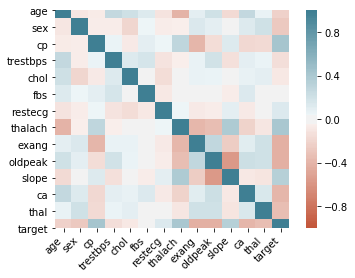

In [8]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


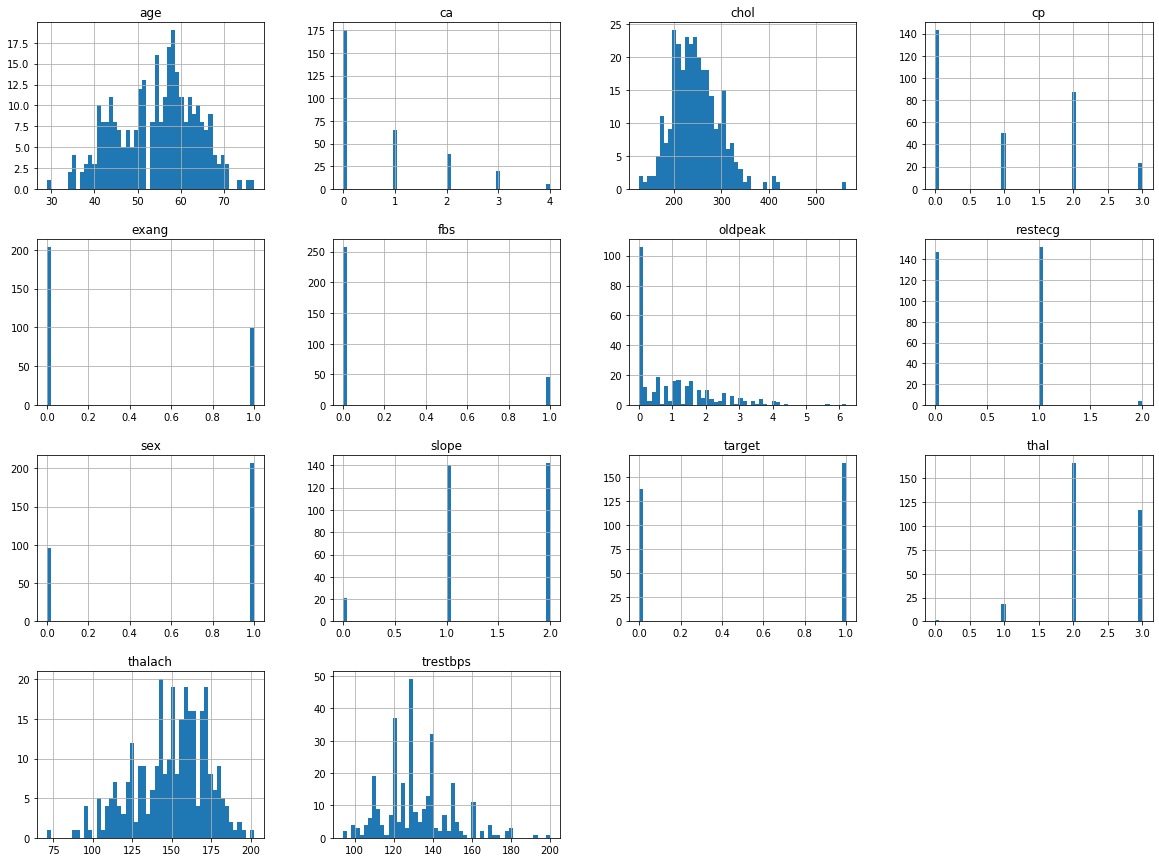

In [12]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

### chol outlier can be removed

In [13]:
%config Completer.use_jedi=False

### Drop the observation which has chol feature an outlier

564
85


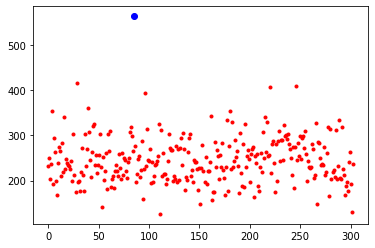

(303, 14)
(302, 14)


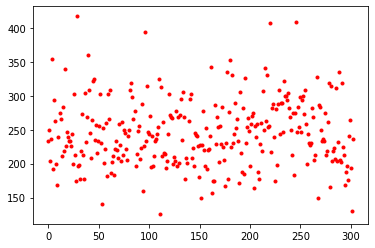

In [77]:
m=max(chol)
print (m)
ii=df.chol.idxmax(axis = 0)
print(ii)

df.chol.describe()

plt.plot(df.chol, "r.")
plt.plot(ii,m,"bo")
plt.show()

df_temp=df
df_temp=df_temp.drop([ii])

print(df.shape)
print(df_temp.shape)

plt.plot(df_temp.chol, "r.")

plt.show()

In [ ]:
features=df.columns.tolist()
print ((df.shape[0]), " number of records")
for val in features:
    print (val,"==>",len((df[val].unique().tolist())), "unique observation")

In [ ]:
Negatives = df.target.value_counts()[0]
Positives = df.target.value_counts()[1]
print("Percentage of Negatives : {:.2f}%".format((df.target.value_counts()[0] / (len(df.target))*100)))
print("Percentage of Positives : {:.2f}%".format((df.target.value_counts()[1] / (len(df.target))*100)))
print(100*len(df[df.target == 0])/df.shape[0])
print(100*len(df[df.target == 1])/df.shape[0])

In [ ]:
print("Number of Negatives = ",df.target.value_counts()[0] )
# 0 as non-Patient
print("Number of Positives = ",df.target.value_counts()[1] )
# 1 as Patient

In [ ]:
print("Number of female Patients = ",df.sex.value_counts()[0] )
# 0 as female 
print("Number of male Patients = ",df.sex.value_counts()[1] )
# 1 as male

In [ ]:
df.groupby('target').mean()

In [ ]:
df.groupby('sex').mean()

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
"""
sns.set_style("white")
sns.boxplot(data=df);
plt.title("Box Plot")
"""

In [ ]:
"""
# Basic correlogram
sns.pairplot(df)
sns.plt.show()
"""

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,5))
df['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#plt.xlabel("Sex (0 = female, 1= male)")
ax[0].set_title('Number of Patients wrt Sex')
ax[0].set_ylabel('Count')
ax[0].set_xlabel("Sex (0 = female, 1= male)")
sns.countplot('sex',data=df,ax=ax[1],order=df['sex'].value_counts().index)
ax[1].set_title('Number of Patients wrt Sex')
ax[1].set_xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,5))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Positive-Negative')
ax[0].set_ylabel('Count')
sns.countplot('target',data=df,ax=ax[1],order=df['target'].value_counts().index)
ax[1].set_title('Posititive & Negative')
plt.show()

In [ ]:
xx=df["age"]
yy=df["trestbps"]
labels = df["target"]
#labels=labels.astype(int)
xxp=xx[labels==1]
yyp=yy[labels==1]
xxz=xx[labels==0]
yyz=yy[labels==0]

In [ ]:
sns.regplot(xxp, yyp, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":50} )
sns.regplot(xxz, yyz, fit_reg=False, scatter_kws={"color":"darkblue","alpha":0.3,"s":50} )
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
title="Posititive&Zeros - Age vs Resting Blood Pressure"
plt.title(title)
plt.legend(["Disease +", "Disease -"])
plt.show()

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease +", "Disease -"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
fig=plt.figure(figsize=(5,4))
title="Positive&Negative - Age vs trestbps"
plt.scatter(xxp, yyp, color='r')
plt.scatter(xxz, yyz, color='b')

plt.xlabel('Age')
plt.ylabel('trestbps')
plt.title(title)
plt.show()

In [ ]:
df['thal'].unique().tolist()

In [ ]:
# 'cp', 'thal' and 'slope' 
df['cp'] = df['cp'].astype('category')
df['thal'] = df['thal'].astype('category')
df['slope'] = df['slope'].astype('category')

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [ ]:
print(matrix_rank(a)) 
print(matrix_rank(b)) 
print(matrix_rank(c)) 
type(a)

In [ ]:
"""
dfNoCat=dfimport pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
print(dfNoCat.shape)
matrix_rank(dfNoCat) 
dfNoCat.columns
"""

In [ ]:
frame = [df,a, b, c]
df_wCatVar = pd.concat(frame, axis = 1)
print(df.shape)
print(df_wCatVar.shape)
type(df_wCatVar)

In [ ]:
fr = [a, b, c]
abc = pd.concat(fr, axis = 1)
print(abc.shape)
print(matrix_rank(abc)) 
abc.columns
abc[(abc.cp_0==0) & (abc.thal_0==0) & (abc.slope_0==0)].shape

In [ ]:
print (df_wCatVar[(df_wCatVar.cp==1)].shape)
print (df_wCatVar[(df_wCatVar.cp_0==1)].shape)

print (df_wCatVar.cp_3[(df_wCatVar.cp==3)].shape)
print (df_wCatVar.cp_3[(df_wCatVar.cp_0==0) & (df_wCatVar.cp_1==0) & (df_wCatVar.cp_2==0)].shape)
print (df_wCatVar.cp_3[(df_wCatVar.cp_0==0)].shape)

In [ ]:
dfDrop = df_wCatVar.drop(columns = ['cp', 'thal', 'slope'])
print(dfDrop.shape)
print(matrix_rank(dfDrop)) 
dfDrop.columns

In [ ]:
finalDf = pd.concat([dfDrop, df[['target']]], axis = 1)
finalDf.head(5)

In [ ]:
print("Original data                               : ", df.shape)
print("After categorical variables added           : ",df_wCatVar.shape)
print("After original categorical variables dropped: ",dfDrop.shape)
print("After target labels added                   : ",finalDf.shape)

In [ ]:
Name="Heart_wCatFeatures.csv"
path="/home/samsung-ub/Desktop/Pyhton/Datasets/"
toWrite = os.path.join("r",path, Name)
finalDf.to_csv(toWrite)